## Project 1

* Starting off, we needed to import the required dependencies for our project. Importing our libraries and prepping the CSV file to be read and interpretted was the first step. One interesting challenge that we encountered early on was the need to break out the dates provided into a useable format for our needs. This involved breaking out the date field that was originally delivered in a YYYY-MM-DD format into three separate columns themselves. 

In [52]:
#import dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import os

# import requests
# import json
import time





#read csv
csv_path = "../Resources/big_five_stocks.csv"
stock_df = pd.read_csv(csv_path, encoding="utf-8")
#rename the date column to a more useable name
astock = stock_df.rename( columns={'Unnamed: 0':'date'}, inplace=False )
#format the date column to be recognized as a datetime object
astock['Formatted Date'] = pd.to_datetime(astock['date'])
#isolate Year, Month, and Day into separate columns
astock['Month'] = astock['Formatted Date'].map(lambda x: x.month)
astock['Year'] = astock['Formatted Date'].map(lambda x: x.year)
astock['Day'] = astock['Formatted Date'].map(lambda x: x.day)
#Filter down to last 10 years
filterstock = astock[(astock['Year'] >= 2009) & (astock['Year'] <= 2019)]
filterstock.head()

,date,name,open,close,high,low,volume,Formatted Date,Month,Year,Day
26437,2009-01-02,AAPL,12.23,12.96,13.01,12.17,26964210.0,2009-01-02,1,2009,2
26438,2009-01-02,AMZN,51.10,54.36,54.53,51.07,7296667.0,2009-01-02,1,2009,2
26439,2009-01-02,GOOGL,154.01,160.66,160.91,152.75,3617574.0,2009-01-02,1,2009,2
26440,2009-01-02,^IXIC,1578.87,1632.21,1635.83,1572.04,0.0,2009-01-02,1,2009,2
26441,2009-01-02,MSFT,19.54,20.33,20.40,19.37,50121848.0,2009-01-02,1,2009,2


Now that we had the data in the notebook, we needed to isolate the important columns and sort the information appropriately. We decided that we only needed the date related fields we would sort by and the accompanying stock data.

In [53]:
#isolate only useful information
organizedstock = filterstock[['name','Year','Month', 'Day', 'open','close','high','low', 'volume']]
#sort by name and date to organize our stock data chronologically
sortedstock = organizedstock.sort_values(by=['name', 'Year', 'Month', 'Day'])
sortedstock

,name,Year,Month,Day,open,close,high,low,volume
26437,AAPL,2009,1,2,12.23,12.96,13.01,12.17,26964210.0
26446,AAPL,2009,1,5,13.30,13.51,13.74,13.24,42458780.0
26448,AAPL,2009,1,6,13.71,13.29,13.88,13.20,46149128.0
26452,AAPL,2009,1,7,13.09,13.00,13.21,12.89,27042958.0
26458,AAPL,2009,1,8,12.92,13.24,13.31,12.86,24052284.0
...,...,...,...,...,...,...,...,...,...
41630,^IXIC,2019,8,19,8006.18,8002.81,8026.75,7974.36,0.0
41636,^IXIC,2019,8,20,7989.36,7948.56,8010.58,7948.09,0.0
41645,^IXIC,2019,8,21,8017.07,8020.21,8036.94,7998.50,0.0
41651,^IXIC,2019,8,22,8038.79,7991.39,8048.58,7937.13,0.0


The first of the values we decided to gather was the total amount of stock sold by each company over the 10 year period. This was done with a simple for loop in which we used the loc and groupby functions to isolate the volumes and sum them by month.

In [54]:
#For loop to get total sum of vol by month
months = [1,2,3,4,5,6,7,8,9,10,11,12]
for month in months:
    totalvolbymo = sortedstock.loc[sortedstock['Month'] == month].groupby('name')['volume'].sum()
    print(totalvolbymo)

name
AAPL     7.236981e+09
AMZN     1.359727e+09
FB       5.719159e+09
GOOGL    6.494569e+08
MSFT     1.134852e+10
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     6.085345e+09
AMZN     1.276771e+09
FB       4.626707e+09
GOOGL    5.584776e+08
MSFT     9.235426e+09
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     6.244181e+09
AMZN     1.189071e+09
FB       4.790840e+09
GOOGL    5.962936e+08
MSFT     9.900353e+09
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     5.787338e+09
AMZN     1.243370e+09
FB       5.316049e+09
GOOGL    6.113509e+08
MSFT     1.045622e+10
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     6.039379e+09
AMZN     1.004306e+09
FB       5.335489e+09
GOOGL    5.096403e+08
MSFT     9.584783e+09
^IXIC    0.000000e+00
Name: volume, dtype: float64
name
AAPL     6.149316e+09
AMZN     9.685126e+08
FB       4.537416e+09
GOOGL    5.212479e+08
MSFT     1.008460e+10
^IXIC    0.000000e+00
Name: volume, dtype: float64
name

The next set of values we needed to isolate were the opening and closing values for each month across each year for each company over the 10 year period. We spent a good amount of time trying to figure out how we were going to approach this. Instead of opting for a nest for loop, we decided to isolate the opening and closing dates by manipulating the original data frame and merging the manipulate dataframe with the original to isolate the values we were after. 

In [55]:
#group by name year and month
groupedstock = sortedstock.groupby(['name','Year','Month'])

#isolate the lowest day available for each month by year and name
firstday = groupedstock['Day'].min()

#isolate the highest day available for each month by year and name
lastday = groupedstock['Day'].max()

In [56]:
#create data frame to house the above values
#create the initial dataframe off the firstday values
summary = pd.DataFrame(firstday)

#add a column to house the lastday values
summary['Last Day'] = lastday
summary.reset_index()

,name,Year,Month,Day,Last Day
0,AAPL,2009,1,2,30
1,AAPL,2009,2,2,27
2,AAPL,2009,3,2,31
3,AAPL,2009,4,1,30
4,AAPL,2009,5,1,29
...,...,...,...,...,...
723,^IXIC,2019,4,1,30
724,^IXIC,2019,5,1,31
725,^IXIC,2019,6,3,28
726,^IXIC,2019,7,1,31


In [57]:
#dataframe merging: summary and sorted stock 
mergeddf = pd.merge(summary, sortedstock, on=['name','Year','Month','Day'])

#reorganizing data for readibility
cleandf = mergeddf[['name','Year','Month','Day','Last Day','open']]

#merge the newly create dataframe with the original on the closing date to isolate the closing date values for each close date of each month by year and name
twomerge = pd.merge(cleandf, sortedstock, left_on=["Last Day", 'name','Year','Month'], right_on=["Day", 'name','Year','Month'])

#Reorganizing column names for readibility
# cleanmerge = twomerge[['name','Year','Month','Day_x','Last Day','open_x','close']]
cleanmerge = twomerge[['name','Year','Month','Day_x','Last Day','open_x','close', 'high', 'low']]

#cleaning column names
openclosedf = cleanmerge.rename( columns={'name':'Name', 'Day_x':'First Day', 'open_x':'Open'}, inplace=False )

openclosedf



,Name,Year,Month,First Day,Last Day,Open,close,high,low
0,AAPL,2009,1,2,30,12.23,12.88,13.37,12.86
1,AAPL,2009,2,2,27,12.71,12.76,13.04,12.52
2,AAPL,2009,3,2,31,12.57,15.02,15.35,15.00
3,AAPL,2009,4,1,30,14.86,17.98,18.14,17.85
4,AAPL,2009,5,1,29,17.97,19.40,19.41,19.12
...,...,...,...,...,...,...,...,...,...
723,^IXIC,2019,4,1,30,7800.24,8095.39,8124.61,8050.55
724,^IXIC,2019,5,1,31,8132.93,7453.15,7506.86,7448.23
725,^IXIC,2019,6,3,28,7441.22,8006.24,8010.15,7961.46
726,^IXIC,2019,7,1,31,8145.85,8175.42,8299.83,8110.02


In [58]:
# Calculate percent change
openclosedf['Percent Change (%)'] = round(((openclosedf['close']-openclosedf['Open'])/openclosedf['Open'])*100,2)
openclosedf['Date'] = pd.to_datetime(openclosedf[['Year', 'Month']].assign(DAY=1))

# create data frames for each ticker name
AAPL_df = openclosedf.loc[openclosedf['Name'] ==  'AAPL']
AMZN_df = openclosedf.loc[openclosedf['Name'] ==  'AMZN']
FB_df = openclosedf.loc[openclosedf['Name'] ==  'FB']
GOOGL_df = openclosedf.loc[openclosedf['Name'] ==  'GOOGL']
MSFT_df = openclosedf.loc[openclosedf['Name'] ==  'MSFT']
IXIC_df = openclosedf.loc[openclosedf['Name'] ==  '^IXIC']


In [59]:
AAPL_df

,Name,Year,Month,First Day,Last Day,Open,close,high,low,Percent Change (%),Date
0,AAPL,2009,1,2,30,12.23,12.88,13.37,12.86,5.31,2009-01-01
1,AAPL,2009,2,2,27,12.71,12.76,13.04,12.52,0.39,2009-02-01
2,AAPL,2009,3,2,31,12.57,15.02,15.35,15.00,19.49,2009-03-01
3,AAPL,2009,4,1,30,14.86,17.98,18.14,17.85,21.00,2009-04-01
4,AAPL,2009,5,1,29,17.97,19.40,19.41,19.12,7.96,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...
123,AAPL,2019,4,1,30,191.64,200.67,203.40,199.11,4.71,2019-04-01
124,AAPL,2019,5,1,31,209.88,175.07,177.99,174.99,-16.59,2019-05-01
125,AAPL,2019,6,3,28,175.60,197.92,199.50,197.05,12.71,2019-06-01
126,AAPL,2019,7,1,31,203.17,213.04,221.37,211.30,4.86,2019-07-01


In [60]:
# sorted_AAPL = AAPL_df.sort_values(by="Percent Change (%)", ascending=False)
# sorted_AAPL.iloc[0]

<IPython.core.display.Javascript object>


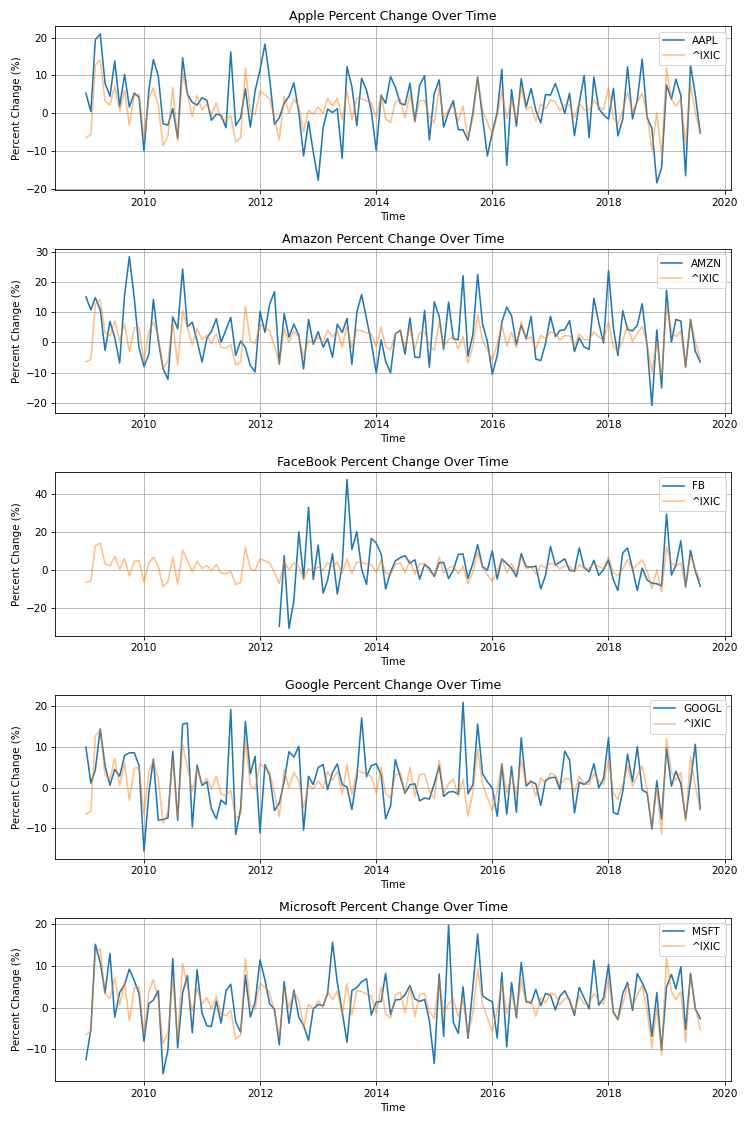

In [61]:
# create 5 subplots comparing each stock to the NASDAQ index
fig, ax = plt.subplots(5)
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
ax4 = ax[3]
ax5 = ax[4]
fig.set_figwidth(10)
fig.set_figheight(15)

# plot each stock to a subplot
ax1.plot(AAPL_df['Date'], AAPL_df['Percent Change (%)'],label = "AAPL" )
ax2.plot(AMZN_df['Date'], AMZN_df['Percent Change (%)'],label = "AMZN")
ax3.plot(FB_df['Date'], FB_df['Percent Change (%)'],label = "FB")
ax4.plot(GOOGL_df['Date'], GOOGL_df['Percent Change (%)'],label = "GOOGL")
ax5.plot(MSFT_df['Date'], MSFT_df['Percent Change (%)'],label = "MSFT")

# plot the NASDAQ index to each subplot
ax1.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)
ax2.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)
ax3.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)
ax4.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)
ax5.plot(IXIC_df['Date'], IXIC_df['Percent Change (%)'], label="^IXIC", alpha=0.5)

# add labels and title for each subplot
ax1.set(xlabel='Time', ylabel='Percent Change (%)',
       title='Apple Percent Change Over Time')
ax1.grid()


ax2.set(xlabel='Time', ylabel='Percent Change (%)',
       title='Amazon Percent Change Over Time')
ax2.grid()


ax3.set(xlabel='Time', ylabel='Percent Change (%)',
       title='FaceBook Percent Change Over Time')
ax3.grid()


ax4.set(xlabel='Time', ylabel='Percent Change (%)',
       title='Google Percent Change Over Time')
ax4.grid()


ax5.set(xlabel='Time', ylabel='Percent Change (%)',
       title='Microsoft Percent Change Over Time')
ax5.grid()

# add legend to each subplot
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")

plt.tight_layout()

plt.show()
plt.savefig('pct_changeV1.1.png')

In [62]:
################ NOTE ##################
# install modelules/ libraries if needed
#install one at a time, not needed after installation
########################################

# pip install cufflinks
# pip install plotly



#install the folling in Conda
# conda install -c plotly plotly-orca

#######################################

In [63]:
#dependencies 
import os
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px


# dataframe of a wide format
openclosedf['Date']=openclosedf.index

#setting colors and creating figure
colors = px.colors.qualitative.Plotly
fig = go.Figure()

# setting x and Y Axis
x_aapl = AAPL_df['Date']
y_aapl = AAPL_df['Percent Change (%)']

x_amzn = AMZN_df['Date']
y_amzn =AMZN_df['Percent Change (%)']

x_fb = FB_df['Date']
y_fb = FB_df['Percent Change (%)']

x_goog = GOOGL_df['Date']
y_goog = GOOGL_df['Percent Change (%)']

x_msft = MSFT_df['Date']
y_msft =MSFT_df['Percent Change (%)']

x_ixic = IXIC_df['Date']
y_ixic = IXIC_df['Percent Change (%)']


#plotting
fig.add_traces(go.Scatter(x=x_aapl, y = y_aapl, mode = 'lines', name = 'AAPL', line=dict(color=colors[0])))
fig.add_traces(go.Scatter(x=x_amzn, y =y_amzn , mode = 'lines', name = 'AMZN', line=dict(color=colors[1])))
fig.add_traces(go.Scatter(x=x_fb, y =y_fb , mode = 'lines', name = 'FB', line=dict(color=colors[2])))
fig.add_traces(go.Scatter(x=x_goog, y =y_goog , mode = 'lines', name = 'GOOGL', line=dict(color=colors[3])))
fig.add_traces(go.Scatter(x=x_msft, y =y_msft, mode = 'lines', name = 'MSFT', line=dict(color=colors[4])))
fig.add_traces(go.Scatter(x=x_ixic, y = y_ixic, mode = 'lines', name = 'IXIC', line=dict(color=colors[5])))

#Labeling the Plot
fig.update_layout(title="Percent Over time (Interactive Plot)",
                  xaxis_title='Date',
                  yaxis_title='Percent Change (%)',
                  legend_title="Company",
                  font=dict(family="Aerial",
                            size=13,
                            color="Black")
                  )

# Zoom Slider
fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)


#printing
fig.show()

#Outputting the image and saving the image to an external file as a png
if not os.path.exists("images"):
    os.mkdir("images")
    
fig.write_image("images/fig1.png")

In [64]:
#Summary Stats table
AAPL_df.describe()

,Year,Month,First Day,Last Day,Open,close,high,low,Percent Change (%)
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2013.843750,6.375000,1.554688,29.898438,97.100781,98.095781,99.138594,97.407266,2.064687
std,3.095431,3.439007,0.849350,1.278778,54.524508,54.285248,54.924485,53.946646,7.562165
min,2009.000000,1.000000,1.000000,23.000000,12.230000,12.760000,13.040000,12.520000,-18.480000
25%,2011.000000,3.000000,1.000000,29.000000,54.565000,54.885000,55.897500,54.525000,-2.650000
50%,2014.000000,6.000000,1.000000,30.000000,92.065000,93.335000,94.225000,92.300000,2.390000
75%,2016.250000,9.000000,2.000000,31.000000,127.585000,128.915000,130.790000,128.655000,6.950000
max,2019.000000,12.000000,4.000000,31.000000,228.410000,227.630000,228.870000,226.000000,21.000000


In [65]:
AAPL_avg = AAPL_df['Percent Change (%)'].mean()
AMZN_avg = AMZN_df['Percent Change (%)'].mean()
FB_avg = FB_df['Percent Change (%)'].mean()
GOOGL_avg = GOOGL_df['Percent Change (%)'].mean()
MSFT_avg = MSFT_df['Percent Change (%)'].mean()
IXIC_avg = IXIC_df['Percent Change (%)'].mean()

pc_avg = [AAPL_avg, AMZN_avg, FB_avg, GOOGL_avg, MSFT_avg, IXIC_avg]
names = ["Apple", "Amazon", "Facebook", "Google", "Microsoft", "Index"]
colors = ["Black", "Green", "Blue", "Red", "Orange", "Purple"]
pc_avg

[2.0646875,
 3.11140625,
 2.110340909090911,
 1.6932812500000005,
 1.6717968749999998,
 1.1743749999999997]

In [66]:
# Build bar graph comparing % change average for 10 years
fig = go.Figure()
fig.add_trace(go.Bar(x=names, y=pc_avg, marker_color=colors))


#Labeling the Plot
fig.update_layout(title="Average Percent Change Over Time ",
                  xaxis_title='Company',
                  yaxis_title='Percent Change (%)',
                  font=dict(family="Aerial",
                            size=13,
                            color="Black")
                  )


fig.show()

In [ ]:
avg_APPL_09 = APPL_09.groupby("Year")["Percent Change (%)"].mean()
avg_APPL_09
APPL_10 = AAPL_df.loc[AAPL_df['Year'] == 2010]
avg_APPL_10 = APPL_10.groupby("Year")["Percent Change (%)"].mean()
avg_APPL_10
APPL_11 = AAPL_df.loc[AAPL_df['Year'] == 2011]
avg_APPL_11 = APPL_11.groupby("Year")["Percent Change (%)"].mean()
avg_APPL_11
APPL_12 = AAPL_df.loc[AAPL_df['Year'] == 2012]
avg_APPL_12 = APPL_12.groupby("Year")["Percent Change (%)"].mean()
avg_APPL_12
APPL_13 = AAPL_df.loc[AAPL_df['Year'] == 2013]
avg_APPL_13 = APPL_13.groupby("Year")["Percent Change (%)"].mean()
avg_APPL_13
APPL_14 = AAPL_df.loc[AAPL_df['Year'] == 2014]
avg_APPL_14 = APPL_14.groupby("Year")["Percent Change (%)"].mean()
avg_APPL_14

import plotly.graph_objects as go
stock=['Apple']


fig = go.Figure(data=[
    go.Bar(name='2009', x=stock, y=[7.98]),
    go.Bar(name='2010', x=stock, y=[2.8]),
    go.Bar(name='2011', x=stock, y=[1.77]),
    go.Bar(name='2012', x=stock, y=[2.19]),
    go.Bar(name='2013', x=stock, y=[0.055]),
    go.Bar(name='2014', x=stock, y=[2.89])

])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [67]:
# pie plot interactive plot: --> https://plotly.com/python/pie-charts/
purchase_vol = round(sortedstock.groupby("name", as_index = False).sum(), 0)
purchase_vol = purchase_vol.loc[purchase_vol['name'] != "^IXIC"]

# Build Pie chart showing volume purchase of big 5 over the last 10 years
fig = go.Figure(data=[go.Pie(labels=names, values=purchase_vol["volume"], hole=.3)])

fig.update_layout(title="Purchase Volume % Over Ten Years for Big 5", 
                  title_x=.5,
                  legend_title="Company",
                  font=dict(family="Aerial",
                            size=13,
                            color="Black")
                  )
fig.show()

In [68]:
# max min summaries
max_pc = openclosedf["Percent Change (%)"].max()
max_info = openclosedf.loc[openclosedf["Percent Change (%)"] == max_pc]

min_pc = openclosedf["Percent Change (%)"].min()
min_info = openclosedf.loc[openclosedf["Percent Change (%)"] == min_pc]

co_df = [AAPL_df, AMZN_df, FB_df, GOOGL_df, MSFT_df, IXIC_df]

for df in co_df:
    df_max_pc = df["Percent Change (%)"].max()
    df_min_pc = df["Percent Change (%)"].min()
    print(df_max_pc, df_min_pc)

21.0 -18.48
28.4 -20.97
47.38 -30.53
20.94 -15.54
19.8 -15.88
14.12 -11.37


In [69]:
# df = DF_max_info[0]

# for f in DF_max_info:
#     df = pd.concat(df, f)
    
    
    
    
    

    
    
    
    
    
    
    
    
# # # length = len(DF_max_info)
# # length = 6
# # # print(length)
# # for x in length:
# #     df_merged=pd.concat([DF_max_info[x],DF_max_info[x+1]],axis=0)
# # df_merged













# length = len(DF_max_info)
# k = 0
# DF_max_info = DF_max_info.reset_index(inplace=True)

# while k < length:
#     df_merged=pd.concat([DF_max_info[k],DF_max_info[k+1]],axis=0)
#     k += 1
# df_merged




















# for df in co_df:
#     for x in df:
#         x_max_pc = x["Percent Change (%)"].max()
#         x_min_pc = x["Percent Change (%)"].min()
#         x_max_info = openclosedf.loc[openclosedf["Percent Change (%)"] == x_max_pc]
# #     DF_max_info.append() = openclosedf.loc[openclosedf["Percent Change (%)"] == df_max_pc]
# #     DF_max_info = df_max_info.append(df_max_info)
# #     print(df_max_info)
#         x_max_info

In [70]:
DF_max_info = []
DF_min_info = []
max_min = []
for df in co_df:
    df_max_pc = df["Percent Change (%)"].max()
    df_min_pc = df["Percent Change (%)"].min()
    df_max_info = openclosedf.loc[openclosedf["Percent Change (%)"] == df_max_pc]
    df_min_info = openclosedf.loc[openclosedf["Percent Change (%)"] == df_min_pc]
    
    DF_max_info.append(df_max_info)
    DF_min_info.append(df_min_info)
                 


In [71]:
DF_max_info

[   Name  Year  Month  First Day  Last Day   Open  close   high    low  \
 3  AAPL  2009      4          1        30  14.86  17.98  18.14  17.85   
 
    Percent Change (%)  Date  
 3                21.0     3  ,
      Name  Year  Month  First Day  Last Day   Open   close   high     low  \
 137  AMZN  2009     10          1        30  92.53  118.81  122.9  118.21   
 
      Percent Change (%)  Date  
 137                28.4   137  ,
     Name  Year  Month  First Day  Last Day   Open  close   high    low  \
 270   FB  2013      7          1        31  24.97   36.8  38.31  36.33   
 
      Percent Change (%)  Date  
 270               47.38   270  ,
       Name  Year  Month  First Day  Last Day    Open  close   high    low  \
 422  GOOGL  2015      7          1        31  543.66  657.5  665.0  657.2   
 
      Percent Change (%)  Date  
 422               20.94   422  ,
      Name  Year  Month  First Day  Last Day  Open  close   high   low  \
 547  MSFT  2015      4          1        30

In [72]:
DF_min_info

[     Name  Year  Month  First Day  Last Day    Open   close    high     low  \
 118  AAPL  2018     11          1        30  219.05  178.58  180.33  177.03   
 
      Percent Change (%)  Date  
 118              -18.48   118  ,
      Name  Year  Month  First Day  Last Day     Open    close     high  \
 245  AMZN  2018     10          1        31  2021.99  1598.01  1623.91   
 
          low  Percent Change (%)  Date  
 245  1565.09              -20.97   245  ,
     Name  Year  Month  First Day  Last Day   Open  close   high    low  \
 258   FB  2012      7          2        31  31.25  21.71  23.37  21.61   
 
      Percent Change (%)  Date  
 258              -30.53   258  ,
       Name  Year  Month  First Day  Last Day    Open   close   high     low  \
 356  GOOGL  2010      1          4        29  313.73  264.97  270.5  262.81   
 
      Percent Change (%)  Date  
 356              -15.54   356  ,
      Name  Year  Month  First Day  Last Day   Open  close   high    low  \
 488  MSFT

In [73]:
pc_max=pd.concat([DF_max_info[0],DF_max_info[1],DF_max_info[2],DF_max_info[3],DF_max_info[4],DF_max_info[5]],axis=0)
pc_max

,Name,Year,Month,First Day,Last Day,Open,close,high,low,Percent Change (%),Date
3,AAPL,2009,4,1,30,14.86,17.98,18.14,17.85,21.00,3
137,AMZN,2009,10,1,30,92.53,118.81,122.90,118.21,28.40,137
270,FB,2013,7,1,31,24.97,36.80,38.31,36.33,47.38,270
422,GOOGL,2015,7,1,31,543.66,657.50,665.00,657.20,20.94,422
547,MSFT,2015,4,1,30,40.60,48.64,49.54,48.60,19.80,547
603,^IXIC,2009,4,1,30,1504.87,1717.30,1753.48,1710.15,14.12,603


In [74]:
pc_min=pd.concat([DF_min_info[0],DF_min_info[1],DF_min_info[2],DF_min_info[3],DF_min_info[4],DF_min_info[5]],axis=0)
pc_min

,Name,Year,Month,First Day,Last Day,Open,close,high,low,Percent Change (%),Date
118,AAPL,2018,11,1,30,219.05,178.58,180.33,177.03,-18.48,118
245,AMZN,2018,10,1,31,2021.99,1598.01,1623.91,1565.09,-20.97,245
258,FB,2012,7,2,31,31.25,21.71,23.37,21.61,-30.53,258
356,GOOGL,2010,1,4,29,313.73,264.97,270.50,262.81,-15.54,356
488,MSFT,2010,5,3,28,30.67,25.80,26.12,25.66,-15.88,488
719,^IXIC,2018,12,3,31,7486.13,6635.28,6659.96,6570.06,-11.37,719


In [75]:
AAPL_df

,Name,Year,Month,First Day,Last Day,Open,close,high,low,Percent Change (%),Date
0,AAPL,2009,1,2,30,12.23,12.88,13.37,12.86,5.31,2009-01-01
1,AAPL,2009,2,2,27,12.71,12.76,13.04,12.52,0.39,2009-02-01
2,AAPL,2009,3,2,31,12.57,15.02,15.35,15.00,19.49,2009-03-01
3,AAPL,2009,4,1,30,14.86,17.98,18.14,17.85,21.00,2009-04-01
4,AAPL,2009,5,1,29,17.97,19.40,19.41,19.12,7.96,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...
123,AAPL,2019,4,1,30,191.64,200.67,203.40,199.11,4.71,2019-04-01
124,AAPL,2019,5,1,31,209.88,175.07,177.99,174.99,-16.59,2019-05-01
125,AAPL,2019,6,3,28,175.60,197.92,199.50,197.05,12.71,2019-06-01
126,AAPL,2019,7,1,31,203.17,213.04,221.37,211.30,4.86,2019-07-01


In [76]:
# Open vs Close daily difference candlestick chart: --> https://plotly.com/python/candlestick-charts/

# setting colors and creating figure
colors = px.colors.qualitative.Plotly
fig = go.Figure()

#plotting
fig.add_traces(go.Candlestick(x = AAPL_df['Date'], open = AAPL_df['Open'],
                              high = AAPL_df['high'], low = AAPL_df['low'], 
                              close = AAPL_df['close'], name = 'AAPL',
                             increasing_line_color = 'blue', decreasing_line_color = 'red'))

fig.add_traces(go.Candlestick(x = AMZN_df['Date'], open = AMZN_df['Open'],
                              high = AMZN_df['high'], low = AMZN_df['low'], 
                              close = AMZN_df['close'], name = 'AMZN',
                             increasing_line_color = 'cyan', decreasing_line_color = 'gray'))

fig.add_traces(go.Candlestick(x=FB_df['Date'],open=FB_df['Open'],
                              high=FB_df['high'],low=FB_df['low'], 
                              close=FB_df['close'], name = 'FB',
                             increasing_line_color= 'green', decreasing_line_color= 'brown'))

fig.add_traces(go.Candlestick(x=GOOGL_df['Date'],open=GOOGL_df['Open'],
                              high=GOOGL_df['high'],low=GOOGL_df['low'], 
                              close=GOOGL_df['close'], name = 'GOOGL',
                             increasing_line_color= 'orange', decreasing_line_color= 'black'))

fig.add_traces(go.Candlestick(x=MSFT_df['Date'],open=MSFT_df['Open'],
                              high=MSFT_df['high'],low=MSFT_df['low'], 
                              close=MSFT_df['close'], name = 'MSFT',
                             increasing_line_color= 'purple', decreasing_line_color= 'goldenrod'))

fig.add_traces(go.Candlestick(x=IXIC_df['Date'],open=IXIC_df['Open'],
                              high=IXIC_df['high'],low=IXIC_df['low'], 
                              close=IXIC_df['close'], name = 'IXIC',
                             increasing_line_color= 'cyan', decreasing_line_color= 'lightpink'))






# Labeling the Plot
fig.update_layout(title="Open Vs Close Daily Difference (Interactive Plot)",
                  xaxis_title='Date',
#                   yaxis_title='Percent Change (%)',
                  legend_title="Company",
                  font=dict(family="Aerial", size=13, color="Black"),
                  
                  shapes = [dict(x0='2016-12-09', x1='2016-12-09', 
                                 y0=0, y1=1, xref='x', yref='paper', line_width=2)],
                  annotations=[dict(x='2016-12-09', y=0.05, xref='x', yref='paper',
                                    showarrow=False, xanchor='left', 
                                    text='Increase Period Begins')]
                  )



#printing
fig.show()


 #Outputting the image and saving the image to an external file as a png
# if not os.path.exists("images"):
#     os.mkdir("images")
    
# fig.write_image("images/fig1.png")

In [77]:
# linear reg (percent change over time)

#plotting
fig.add_traces(go.Scatter(x=x_aapl, y = y_aapl, mode = 'markers', name = 'AAPL', line=dict(color=colors[0])))
fig.add_traces(go.Scatter(x=x_amzn, y =y_amzn , mode = 'markers', name = 'AMZN', line=dict(color=colors[1])))
fig.add_traces(go.Scatter(x=x_fb, y =y_fb , mode = 'markers', name = 'FB', line=dict(color=colors[2])))
fig.add_traces(go.Scatter(x=x_goog, y =y_goog , mode = 'markers', name = 'GOOGL', line=dict(color=colors[3])))
fig.add_traces(go.Scatter(x=x_msft, y =y_msft, mode = 'markers', name = 'MSFT', line=dict(color=colors[4])))
fig.add_traces(go.Scatter(x=x_ixic, y = y_ixic, mode = 'markers', name = 'IXIC', line=dict(color=colors[5])))

#printing
fig.show()







    
    
    
    
    


In [78]:

#using a function to plot scatter plots with linear regression

# def linear_reg_plotting(x_axis, y_axis, x_lab, y_lab, title, savename, linepos):
def lin_reg_plotting(x_axis, y_axis, x_lab, y_lab, title, linepos):
    
    #linear Regression
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_axis, y_axis)
    
    #line formula --> y=mx+b
    reg_val = x_axis * slope + intercept
    lineeq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    #scatterplot and lineplot
    plt.scatter(x_axis, y_axis, marker = "o")
    plt.plot(x_axis, reg_val, color='r')
    plt.annotate(lineeq, linepos, color='red',fontsize = 16)
    
    
    #labeling
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    
#     #exporting plot as png
#     plt.savefig(f"output_data/weatherpy/{savename}.png")
    
    #printing
    print(f'The r-Value is: {rvalue}')
    plt.show()  
    
    

In [79]:
#labeling
x_lab = 'Date'
y_lab = 'Percent Change (%)'
title = f'Date vs. Percent Change (%)'

# #saving
# savename = 'fig 6 - LinearREG-Lat_V_Temp - South.png'

#line equation position
linepos = (-55,90)

#function
# line_reg_plotting(southern_cities['Lat'], southern_cities['Max Temp'], x_lab, y_lab, title, savename,linepos)  
lin_reg_plotting(AAPL_df['Date'], AAPL_df['Percent Change (%)'], x_lab, y_lab, title, linepos)  

# #conclusions
# print('Linear Regression = Positive Correlation')
# print('As you move towards the Equator (Lat:0), the temperature rises in the southern hemisphere cities.')

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

<IPython.core.display.Javascript object>


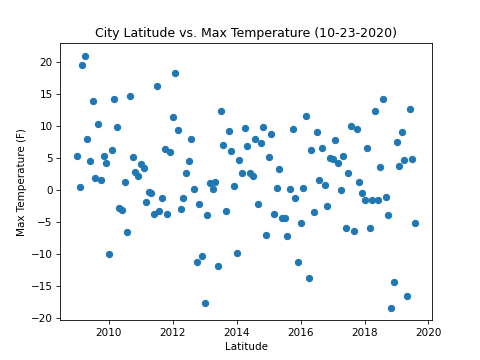

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

In [80]:
#Scatterplot
plt.scatter(AAPL_df['Date'], AAPL_df['Percent Change (%)'], marker = "o")

#labeling
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#linear Regression
(slope, intercept, rvalue, pvalue, std_err) = linregress(AAPL_df['Date'], AAPL_df['Percent Change (%)'])

#line formula --> y=mx+b
reg_val = northern_cities['Lat'] * slope + intercept
lineeq = f'y = {round(slope,2)}x + {round(intercept,2)}'

#line plotting
plt.plot(northern_cities['Lat'], reg_val, color='r')
plt.annotate(lineeq, (5,20), color='red', fontsize=16)

#exporting plot as png
# plt.savefig("output_data/weatherpy/fig 5 - LinearREG-Lat_V_Temp - North.png")

#printing
print(f'The r-Value is: {rvalue}')
plt.show()

#conclusions
print('Linear Regression = Negative Correlation')
print('As you move away from the Equator (Lat:0), the Temperature drops in the northern hemisphere cities.')

In [30]:
# from datetime import datetime

# open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
# high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
# low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
# close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
# dates = [datetime(year=2013, month=10, day=10),
#          datetime(year=2013, month=11, day=10),
#          datetime(year=2013, month=12, day=10),
#          datetime(year=2014, month=1, day=10),
#          datetime(year=2014, month=2, day=10)]

# fig = go.Figure(data=[go.Candlestick(x=dates,
#                        open=open_data, high=high_data,
#                        low=low_data, close=close_data)])

# fig.show()

In [ ]:
# AAPL_df
# AMZN_df
# FB_df 
# GOOGL_df
# MSFT_df 
# IXIC_df